In [ ]:
import pandas as pd
import seaborn as sns # gráficas más elaboradas que matplotlib
import matplotlib.pyplot as plt # gráficas en general
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
ruta_train = '/content/train.csv'
ruta_test = '/content/test.csv'
ruta_gender = '/content/gender_submission.csv'
df_train = pd.read_csv(ruta_train)
df_test = pd.read_csv(ruta_test)
df_gender = pd.read_csv(ruta_gender)

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<Axes: xlabel='Pclass', ylabel='count'>

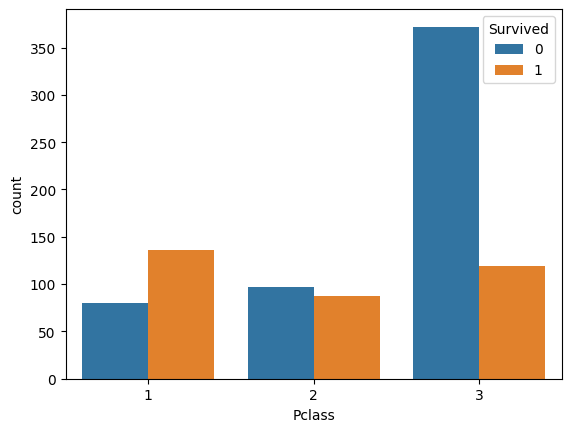

In [ ]:
# gráfica de dos variables categoricas "Pclass" vs. "Survived" con seaborn
sns.countplot(x='Pclass', hue='Survived', data=df_train)

<Axes: xlabel='Sex', ylabel='count'>

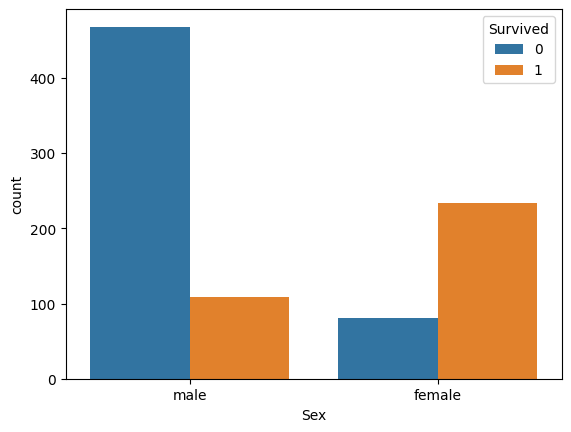

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=df_train)

In [ ]:
# df_train['Age'].unique()

In [ ]:
df_train['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


<Axes: xlabel='Age', ylabel='count'>

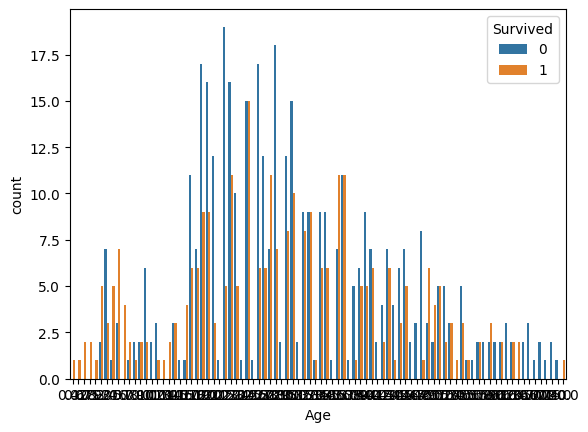

In [ ]:
sns.countplot(x='Age', hue='Survived', data=df_train)

In [ ]:
def grupo_etareo(edad):
  if edad >= 0 and edad < 10:
    return '0-10'
  elif edad >= 10 and edad < 20:
    return '10-20'
  elif edad >= 20 and edad < 30:
    return '20-30'
  elif edad >= 30 and edad < 40:
    return '30-40'
  elif edad >= 40 and edad < 50:
    return '40-50'
  elif edad >= 50 and edad < 60:
    return '50-60'
  elif edad >= 60 and edad < 70:
    return '60-70'
  else:
    return '70-80'


In [ ]:
# crea una variable que agrupe los datos de la variable 'Age' de 10 en 10
df_train['AgeGroup'] = df_train['Age'].apply(grupo_etareo)
df_train['AgeGroup'].unique()


array(['20-30', '30-40', '70-80', '50-60', '0-10', '10-20', '40-50',
       '60-70'], dtype=object)

<Axes: xlabel='AgeGroup', ylabel='count'>

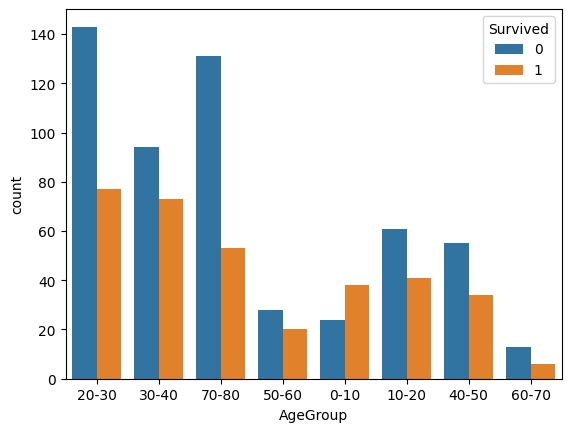

In [ ]:
sns.countplot(x='AgeGroup', hue='Survived', data=df_train)

In [ ]:
# selecciona las variables
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})
df_train['Embarked'] = df_train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [ ]:
df_train_corr = df_train[['Age', 'Fare']]
df_train_corr.corr()

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


In [ ]:
# tabla pivot entre variables categoricas
pd.crosstab(df_train['Sex'], df_train['Survived'])

Survived,0,1
Sex,,
0,468,109
1,81,233


In [ ]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

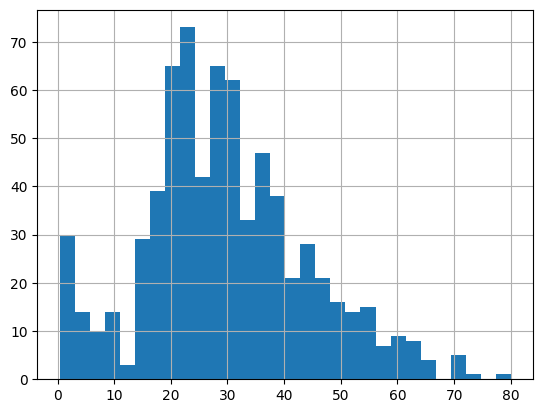

In [ ]:
# histograma de la variable 'Age'
df_train['Age'].hist(bins=30)

In [ ]:
df_train.drop('Cabin', axis=1, inplace=True)
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)
# borra filas con respecto a la columna Embarked
df_train.dropna(subset=['Embarked'],inplace=True)

<ipython-input-141-8aa6cfae2eec>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)


In [ ]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'AgeGroup'],
      dtype='object')

In [ ]:
columnas = ['PassengerId', 'Name', 'Ticket', 'AgeGroup']
df_train.drop(columnas, axis=1, inplace=True)

In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


In [ ]:
X_test = df_test.drop(['PassengerId',] , axis=1)

In [ ]:
# Crea una red neuronal para el conjunto de datos de entrenamiento
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(7,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compila el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

In [ ]:
X_test = df_test.drop(['PassengerId','Name', 'Ticket'], axis=1)
y_test = df_gender['Survived']

In [ ]:
X_test.drop('Cabin', axis=1, inplace=True)
X_test['Age'].fillna(X_test['Age'].mean(), inplace=True)
X_test['Fare'].fillna(X_test['Fare'].mean(), inplace=True)
X_test['Embarked'] = X_test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
X_test['Sex'] = X_test['Sex'].map({'male': 0, 'female': 1})

<ipython-input-152-da650b9d1e04>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['Age'].fillna(X_test['Age'].mean(), inplace=True)
<ipython-input-152-da650b9d1e04>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
X_test.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
y_test.isnull().sum()

0

In [ ]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [ ]:
X_test.shape, y_test.shape

((418, 7), (418,))

In [ ]:
X.shape

(889, 7)

In [ ]:
# entrena el modelo
model.fit(X,
          y,
          epochs=20,
          batch_size=32,
          validation_data = (X_test, y_test))

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5554 - loss: 0.7477 - val_accuracy: 0.6866 - val_loss: 0.6062
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6939 - loss: 0.6205 - val_accuracy: 0.6794 - val_loss: 0.6542
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6867 - loss: 0.5960 - val_accuracy: 0.7033 - val_loss: 0.5911
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6829 - loss: 0.6067 - val_accuracy: 0.6866 - val_loss: 0.7244
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7030 - loss: 0.6126 - val_accuracy: 0.6818 - val_loss: 0.5636
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7173 - loss: 0.5780 - val_accuracy: 0.7464 - val_loss: 0.6579
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7379 - loss: 0.5712 - val_accuracy: 0.7297 - val_loss: 0.5229
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7668 - loss: 0.5163 - val_accuracy: 0.7464 - val_loss

In [ ]:
# testea el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8588 - loss: 0.4557 
Test accuracy: 0.8540669679641724


In [ ]:
history_dict = model.history

In [ ]:
# # gráfica los epoch vs loss function
# plt.plot(model.history.history['loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.show()

KeyError: 'loss'